In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load and pre-process the dataset 
# 1. Load datasets
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# 2. Extract labels 
y_train = train_data['SalePrice'].to_numpy().astype(np.float)
train_data.drop('SalePrice',axis=1,inplace=True)

# 3, Extract test data ids and drop ids
test_ids = test_data['Id'].to_numpy().astype(np.int)
test_data.drop('Id', axis=1, inplace=True)
train_data.drop('Id', axis=1, inplace=True)

# 4. Concatenate training and test datasets so that one hot vector creation works properly (creates columns for all categories)
train_data_rows = len(train_data.index)
train_data = pd.concat([train_data, test_data])

# 5. Change qualitative scales to quantitative values
train_data.loc[:,'LotShape'] = train_data.loc[:,'LotShape'].replace(['Reg','IR1','IR2','IR3'],[1.5,0.5,-0.5,-1.5])
train_data.drop('LotShape',axis=1,inplace=True)
train_data.loc[:,'LandSlope'] = train_data.loc[:,'LandSlope'].replace(['Gtl','Mod','Sev'],[1.,0.,-1.])
train_data.drop('LandSlope',axis=1,inplace=True)
train_data.loc[:,'ExterQual'] = train_data.loc[:,'ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data.drop('ExterQual',axis=1,inplace=True)
train_data.loc[:,'ExterCond'] = train_data.loc[:,'ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data.drop('ExterCond',axis=1,inplace=True)
train_data.loc[:,'BsmtQual'] = train_data.loc[:,'BsmtQual'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['BsmtQual'].fillna(-1.5, inplace = True)
train_data.drop('BsmtQual',axis=1,inplace=True)
train_data.loc[:,'BsmtCond'] = train_data.loc[:,'BsmtCond'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['BsmtCond'].fillna(-1.5, inplace = True)
train_data.drop('BsmtCond',axis=1,inplace=True)
train_data.loc[:,'BsmtExposure'] = train_data.loc[:,'BsmtExposure'].replace(['Gd','Av','Mn','No'],[1.,0.5,0.,-0.5])
train_data['BsmtExposure'].fillna(-1., inplace = True)
train_data.drop('BsmtExposure',axis=1,inplace=True)
train_data.loc[:,'BsmtFinType1'] = train_data.loc[:,'BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'],[1.5,1.0,0.5,0.,-0.5,-1.])
train_data['BsmtFinType1'].fillna(-1.5, inplace = True)
train_data.drop('BsmtFinType1',axis=1,inplace=True)
train_data.loc[:,'BsmtFinType2'] = train_data.loc[:,'BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'],[1.5,1.0,0.5,0.,-0.5,-1.])
train_data['BsmtFinType2'].fillna(-1.5, inplace = True)
train_data.drop('BsmtFinType2',axis=1,inplace=True)
train_data.loc[:,'HeatingQC'] = train_data.loc[:,'HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data.drop('HeatingQC',axis=1,inplace=True)
train_data.loc[:,'KitchenQual'] = train_data.loc[:,'KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['KitchenQual'].fillna(0., inplace = True)
train_data.drop('KitchenQual',axis=1,inplace=True)
train_data.loc[:,'Functional'] = train_data.loc[:,'Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],[1.5,1.,0.5,0.,-0.5,-1.,-1.5,-2.])# train_data = pd.get_dummies(train_data)
train_data['Functional'].fillna(1.5, inplace = True)
train_data.drop('Functional',axis=1,inplace=True)
train_data.loc[:,'FireplaceQu'] = train_data.loc[:,'FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['FireplaceQu'].fillna(-1.5, inplace = True)
train_data.drop('FireplaceQu',axis=1,inplace=True)
train_data.loc[:,'GarageFinish'] = train_data.loc[:,'GarageFinish'].replace(['Fin','RFn','Unf'],[1.5,0.5,-0.5])
train_data['GarageFinish'].fillna(-1.5, inplace = True)
train_data.drop('GarageFinish',axis=1,inplace=True)
train_data.loc[:,'GarageQual'] = train_data.loc[:,'GarageQual'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['GarageQual'].fillna(-1.5, inplace = True)
train_data.drop('GarageQual',axis=1,inplace=True)
train_data.loc[:,'GarageCond'] = train_data.loc[:,'GarageCond'].replace(['Ex','Gd','TA','Fa','Po'],[1.,0.5,0.,-0.5,-1.])
train_data['GarageCond'].fillna(-1.5, inplace = True)
train_data.drop('GarageCond',axis=1,inplace=True)
train_data.loc[:,'PoolQC'] = train_data.loc[:,'PoolQC'].replace(['Ex','Gd','TA','Fa'],[1.,0.5,0.,-0.5])
train_data['PoolQC'].fillna(0., inplace = True)
train_data.drop('PoolQC',axis=1,inplace=True)
train_data['BsmtFullBath'].fillna(0, inplace = True)
train_data['BsmtHalfBath'].fillna(0, inplace = True)
train_data['GarageCars'].fillna(0, inplace = True)
train_data['SaleType'].fillna(train_data['SaleType'].mode()[0], inplace = True)
train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0], inplace = True)
train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0], inplace = True)

# 6. Combine month and year columns
train_data.loc[:,'YrSold'] = train_data.loc[:,'YrSold'] + train_data.loc[:,'MoSold']/12.
train_data.drop('MoSold',axis=1,inplace=True)

# 7. For quantitative columns, normalize and fill NaN values
area_columns = ['LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for col in area_columns:   # fill NaN values with zero area
    train_data[col].fillna(0., inplace = True)
col_mean, col_std = train_data[area_columns].mean(), train_data[area_columns].std()
train_data.loc[:,area_columns] = (train_data.loc[:,area_columns] - col_mean) / col_std

norm_columns = ['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MiscVal','YrSold']
col_mean, col_std = train_data[norm_columns].mean(), train_data[norm_columns].std()
for col, mean in zip(norm_columns, col_mean):   # fill NaN values with mean of the column
    train_data[col].fillna(mean, inplace = True)
train_data.loc[:,norm_columns] = (train_data.loc[:,norm_columns] - col_mean) / col_std

# 8. Create new features for total square footage and total number of bathrooms
train_data['TotalSF'] = train_data.loc[:,'1stFlrSF'] + train_data.loc[:,'2ndFlrSF'] + train_data.loc[:,'TotalBsmtSF']
train_data['TotalBathrooms'] = train_data.loc[:,'FullBath'] + 0.5*train_data.loc[:,'HalfBath']  + train_data.loc[:,'BsmtFullBath'] + 0.5*train_data.loc[:,'BsmtHalfBath']
    
# 9. Convert 'MSSubClass' into categorical
train_data.loc[:,'MSSubClass'] = train_data.loc[:,'MSSubClass'].apply(str)

# 10. Convert categorical to one hot encoding
train_data = pd.get_dummies(train_data)

# 11. Split data back into training and eval datasets
test_data = train_data.iloc[train_data_rows:,:]
train_data = train_data.iloc[:train_data_rows,:]

# 12. Convert to numpy float arrays
x_train = train_data.to_numpy().astype(np.float)
x_test = test_data.to_numpy().astype(np.float)
y_train = y_train.astype(np.float)

# 13. Shuffle training data
indices = np.arange(x_train.shape[0])  # randomly shuffle order of data
np.random.seed(3)
np.random.shuffle(indices)

# 14. Split into train and eval datasets
split_index = 1100
x_train_original = x_train[indices,:]
y_train_original = y_train[indices]
x_eval = x_train_original[split_index:,:]
y_eval = y_train_original[split_index:]
x_train = x_train_original[:split_index,:]
y_train = y_train_original[:split_index]
print(x_train.shape, y_train.shape, x_eval.shape, y_eval.shape, test_ids.shape, x_test.shape)

# 15. Check no null entries and show sample
# pd.set_option('display.max_columns', 300)
# print(train_data.isnull().sum().sum())
# pd.set_option('display.max_rows', 500)
# train_data.sample(100)

(1100, 227) (1100,) (360, 227) (360,) (1459,) (1459, 227)


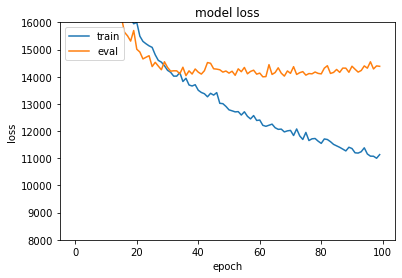

In [3]:
# train with portion of original training set and validate with remainder
keras.backend.clear_session()
model = tf.keras.models.Sequential([
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')])
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
history = model.fit(x_train, y_train, epochs=100, batch_size = 32, validation_data = (x_eval, y_eval), verbose=0)
plt.ylim(top=16000, bottom=8000)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

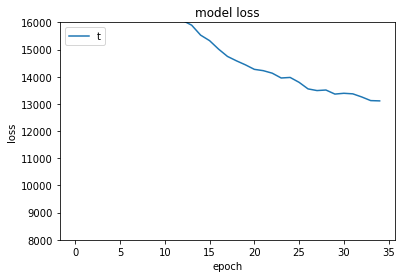

In [4]:
# train with full training set with 'optimal' number of epochs
keras.backend.clear_session()
model = tf.keras.models.Sequential([
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')])
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
history = model.fit(x_train_original, y_train_original, epochs=35, batch_size = 32, verbose=0)
plt.ylim(top=16000, bottom=8000)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='upper left')
plt.show()

In [5]:
predictions = model.predict(x_test).reshape(x_test.shape[0])
output = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               58368     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 190,209
Trainable params: 190,209
Non-trainable params: 0
_________________________________________________________________
